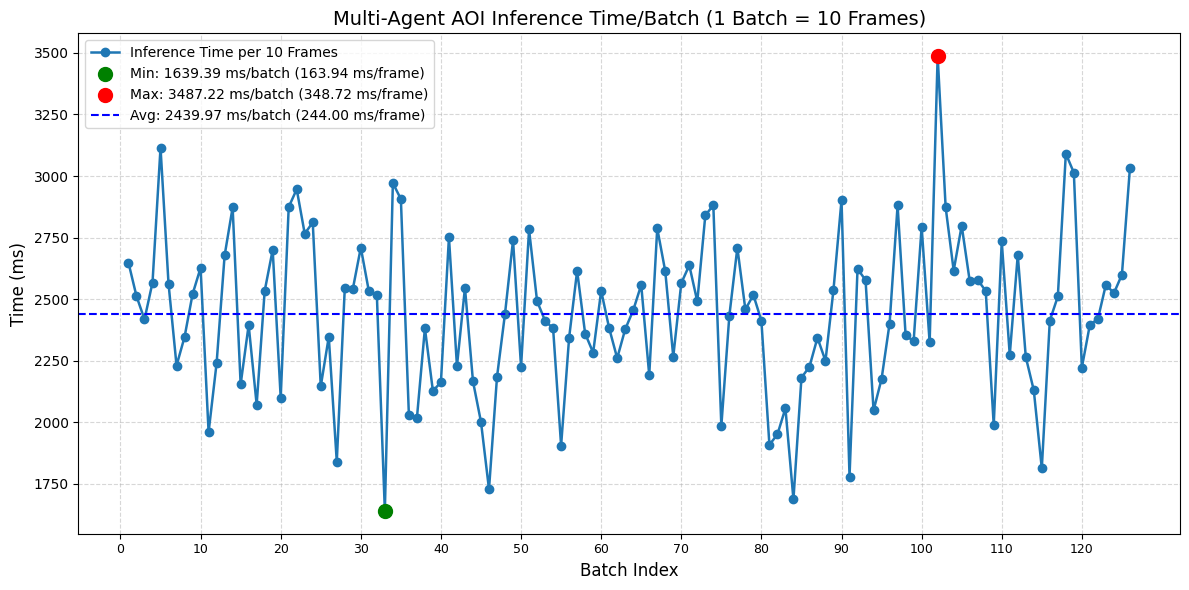

In [31]:
import matplotlib.pyplot as plt

def plot_inference_times_from_file(filepath: str):
	"""Đọc file thời gian inference (1 cột) và vẽ biểu đồ trực quan hóa."""
	times = []

	with open(filepath, 'r') as file:
		for line in file:
			try:
				times.append(float(line.strip()))
			except ValueError:
				continue  

	batches = list(range(1, len(times) + 1))
	avg_time = sum(times) / len(times)
	min_val = min(times)
	max_val = max(times)
	min_idx = times.index(min_val)
	max_idx = times.index(max_val)

	plt.figure(figsize=(12, 6))
	plt.plot(batches, times, label="Inference Time per 10 Frames", marker='o', linewidth=1.8)

	plt.scatter(min_idx + 1, min_val, color='green', s=100,
		label=f"Min: {min_val:.2f} ms/batch ({min_val/10:.2f} ms/frame)", zorder=5)
	plt.scatter(max_idx + 1, max_val, color='red', s=100,
		label=f"Max: {max_val:.2f} ms/batch ({max_val/10:.2f} ms/frame)", zorder=5)

	### Vẽ đường trung bình
	plt.axhline(avg_time, color='blue', linestyle='--', label=f"Avg: {avg_time:.2f} ms/batch ({avg_time/10:.2f} ms/frame)")

	### Tên biểu đồ 
	plt.title("Multi-Agent AOI Inference Time/Batch (1 Batch = 10 Frames)", fontsize=14)
	plt.xlabel("Batch Index", fontsize=12)
	plt.xticks(
		ticks=range(0, len(batches), 10),  # mỗi 5 tick 1 mốc, tùy chỉnh theo độ dài
		fontsize=9,
		rotation=0   # nghiêng nhẹ cho dễ đọc
	)
	plt.ylabel("Time (ms)", fontsize=12)
	plt.grid(True, linestyle='--', alpha=0.5)
	plt.legend()
	plt.tight_layout()
	plt.show()



FILE_PATH = "/home/chwenjun225/projects/DeepEngine/evals/inference_times.csv"
plot_inference_times_from_file(FILE_PATH) 